# NYC TRIP DATA ANALYSIS

An Exploratory Data Analysis is performed on the  New York City Taxi Trip Duration dataset.The NYC Taxi Trip Duration dataset is a collection of records related to taxi trips in New York City. The dataset contains information such as pickup and dropoff timestamps, pickup and dropoff locations, distances, fares, and other trip details.

In [1]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
#loading dataset
df = pd.read_csv("C:\\Users\\ASUS\\Desktop\\NYC_TRIP_DURATION\\train.csv")

In [17]:
print("Rows: {}".format(df.shape[0]))
print("Columns: {}".format(df.shape[1]))

Rows: 1458644
Columns: 11


In [7]:
#displaying first five rows using head
df.head()


,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


### EDA

In [9]:
#gathering general information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


In [10]:
# Checking for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64


In [12]:
#summary statistics
df.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


<ul>
id: Unique identifier for each trip record.<br>
vendor_id: ID of the taxi service provider.<br>
pickup_datetime: Date and time when the taxi ride started.<br>
dropoff_datetime: Date and time when the taxi ride ended.<br>
passenger_count: Number of passengers in the taxi.<br>
pickup_longitude and pickup_latitude: Longitude and latitude of the pickup location.<br>
dropoff_longitude and dropoff_latitude: Longitude and latitude of the dropoff location.<br>
store_and_fwd_flag: Whether the trip record was held in vehicle memory before sending it to the vendor.<br>
trip_duration: Duration of the taxi trip in seconds.
</ul>

In [13]:
# Display unique values in categorical columns
print("\nUnique Values in Categorical Columns:")
print("Vendor ID:", df['vendor_id'].unique())
print("Store and Fwd Flag:", df['store_and_fwd_flag'].unique())


Unique Values in Categorical Columns:
Vendor ID: [2 1]
Store and Fwd Flag: ['N' 'Y']


In [16]:
# Check for duplicate rows
duplicate_rows = df[df.duplicated()]
print("\nNumber of Duplicate Rows:", len(duplicate_rows))


Number of Duplicate Rows: 0


In [27]:
# Check for any outliers in numerical columns
numerical_columns = ['passenger_count', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'trip_duration']
outliers = df[numerical_columns][(df[numerical_columns] > df[numerical_columns].mean() + 3 * df[numerical_columns].std()) | (df[numerical_columns] < df[numerical_columns].mean() - 3 * df[numerical_columns].std())]
print("\nPotential Outliers:")
print(outliers)


Potential Outliers:
         passenger_count  pickup_longitude  pickup_latitude  \
0                    NaN               NaN              NaN   
1                    NaN               NaN              NaN   
2                    NaN               NaN              NaN   
3                    NaN               NaN              NaN   
4                    NaN               NaN              NaN   
...                  ...               ...              ...   
1458639              NaN               NaN              NaN   
1458640              NaN               NaN              NaN   
1458641              NaN               NaN              NaN   
1458642              NaN               NaN              NaN   
1458643              NaN               NaN              NaN   

         dropoff_longitude  dropoff_latitude  trip_duration  
0                      NaN               NaN            NaN  
1                      NaN               NaN            NaN  
2                      NaN          

In [18]:
#converting it in datetime
df["pickup_datetime"] = pd.to_datetime(df["pickup_datetime"])
df["dropoff_datetime"] = pd.to_datetime(df["dropoff_datetime"])

In [21]:
# Explore the most common pickup and dropoff locations
print("\nTop 5 most common pickup locations:")
print(df['pickup_longitude'].round(2).value_counts().head())


Top 5 most common pickup locations:
pickup_longitude
-73.99    337261
-73.98    323784
-73.97    196739
-74.00    165947
-73.96    137621
Name: count, dtype: int64


In [22]:
#top dropoff locations 
print("\nTop 5 most common dropoff locations:")
print(df['dropoff_longitude'].round(2).value_counts().head())


Top 5 most common dropoff locations:
dropoff_longitude
-73.98    320350
-73.99    288163
-73.97    189886
-74.00    155655
-73.96    151474
Name: count, dtype: int64


In [24]:
#Explore the hours of the day with the most pickups
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df['pickup_hour'] = df['pickup_datetime'].dt.hour
print("\nHours of the day with the most pickups:")
print(df['pickup_hour'].value_counts().sort_index())


Hours of the day with the most pickups:
pickup_hour
0     53248
1     38571
2     27972
3     20895
4     15792
5     15002
6     33248
7     55600
8     67053
9     67663
10    65437
11    68476
12    71873
13    71473
14    74292
15    71811
16    64313
17    76483
18    90600
19    90308
20    84072
21    84185
22    80492
23    69785
Name: count, dtype: int64


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 18 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   id                  1458644 non-null  object        
 1   vendor_id           1458644 non-null  int64         
 2   pickup_datetime     1458644 non-null  datetime64[ns]
 3   dropoff_datetime    1458644 non-null  datetime64[ns]
 4   passenger_count     1458644 non-null  int64         
 5   pickup_longitude    1458644 non-null  float64       
 6   pickup_latitude     1458644 non-null  float64       
 7   dropoff_longitude   1458644 non-null  float64       
 8   dropoff_latitude    1458644 non-null  float64       
 9   store_and_fwd_flag  1458644 non-null  object        
 10  trip_duration       1458644 non-null  int64         
 11  pickup_month        1458644 non-null  int64         
 12  pickup_day          1458644 non-null  int64         
 13  pickup_weekd

In [29]:
df["trip_duration"].describe()

count    1.458644e+06
mean     9.594923e+02
std      5.237432e+03
min      1.000000e+00
25%      3.970000e+02
50%      6.620000e+02
75%      1.075000e+03
max      3.526282e+06
Name: trip_duration, dtype: float64

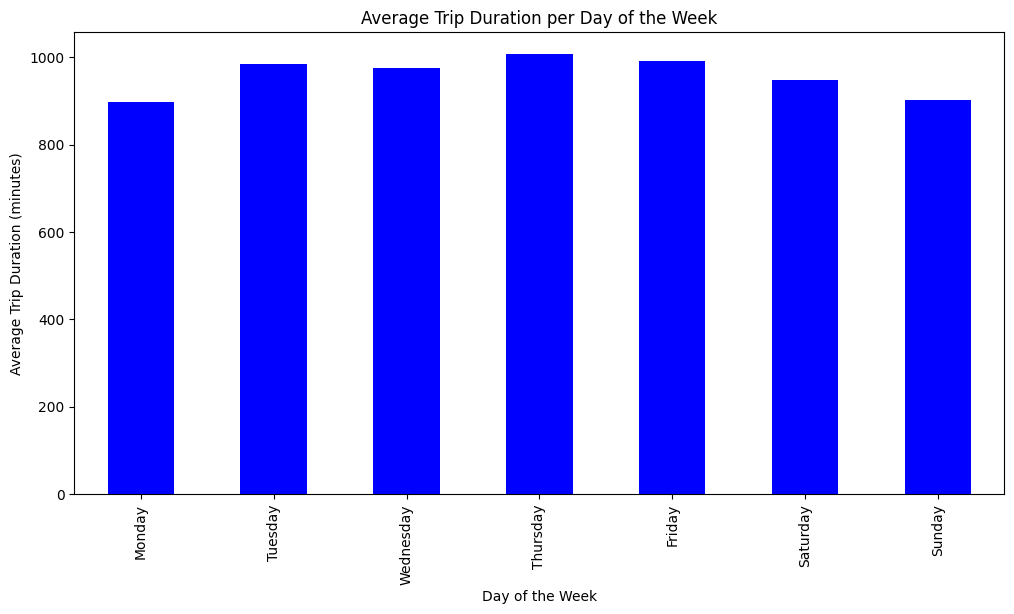

In [30]:
# Extract the day of the week (0 = Monday, 1 = Tuesday, ..., 6 = Sunday)
df['day_of_week'] = df['pickup_datetime'].dt.dayofweek

# Group by day of the week and calculate the average trip duration
daily_avg = df.groupby('day_of_week')['trip_duration'].mean()

# Plot the average trip duration per day of the week
plt.figure(figsize=(12, 6))
daily_avg.plot(kind='bar', color='b')
plt.title('Average Trip Duration per Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Trip Duration (minutes)')
plt.xticks(range(7), ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.show()

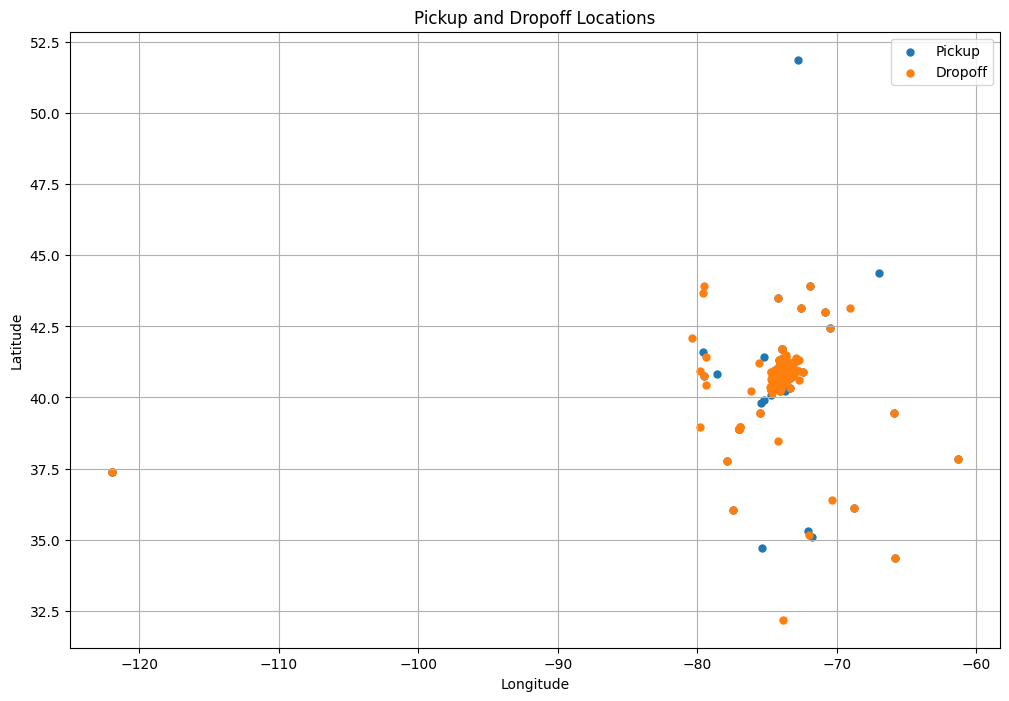

In [39]:
#  Scatter plot of pickup and dropoff locations
plt.figure(figsize=(12, 8))
plt.scatter(df['pickup_longitude'], df['pickup_latitude'], s=25, label='Pickup', alpha=1)
plt.scatter(df['dropoff_longitude'], df['dropoff_latitude'], s=25, label='Dropoff', alpha=1)
plt.title('Pickup and Dropoff Locations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.grid(True)
plt.show()

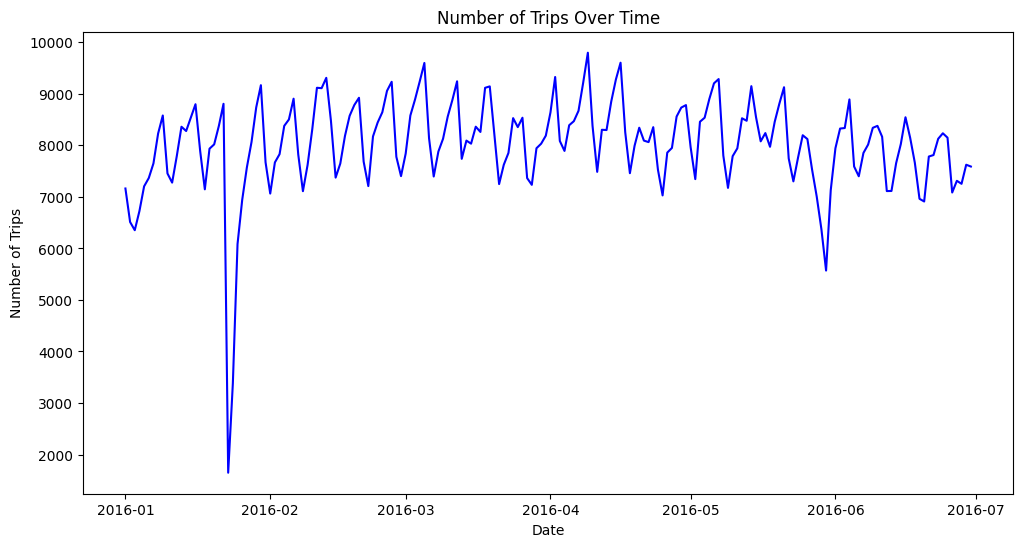

In [40]:
# Count of trips over time
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df['dropoff_datetime'] = pd.to_datetime(df['dropoff_datetime'])

daily_trip_counts = df.resample('D', on='pickup_datetime').size()

plt.figure(figsize=(12, 6))
plt.plot(daily_trip_counts.index, daily_trip_counts.values, color='blue')
plt.title('Number of Trips Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Trips')
plt.show()